In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = 'c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
SENSITIVE_ATTR_FOR_INTERVENTION = 'SEX&RAC1P'
# MODEL_NAMES = ['LogisticRegression']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(72, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,1.000000,0.000000,0.733813,1.000000,0.000000,0.693694,1.000000,0.000000,0.716000,0
24,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,1.000000,0.000000,0.540182,1.000000,0.000000,0.528651,1.000000,0.000000,0.534731,0
48,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,0.000000,1.000000,0.550964,0.000000,1.000000,0.552426,0.000000,1.000000,0.551648,0
72,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,0.000000,1.000000,0.114054,0.000000,1.000000,0.153021,0.000000,1.000000,0.130818,0
96,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,0.116814,0.197505,0.136512,0.114910,0.196064,0.141674,0.117221,0.197053,0.138804,0
120,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,0.846574,0.721475,0.814628,0.847203,0.724829,0.806643,0.844052,0.721922,0.811083,0
144,PPV,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,1.000000,0.000000,0.677755,1.000000,0.000000,0.645598,1.000000,0.000000,0.662338,0
168,Positive-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,1.000000,0.413428,0.662534,1.000000,0.387500,0.693271,1.000000,0.444759,0.676923,0
192,Sample_Size,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,2008.000000,800.000000,2085.000000,1530.000000,555.000000,1665.000000,1155.000000,510.000000,3750.000000,0
216,Selection-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-04 11:47:57.675,c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b,Exp_iter_1,100,...,0.229084,0.292500,0.230695,0.213072,0.279279,0.266066,0.247619,0.307843,0.246400,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

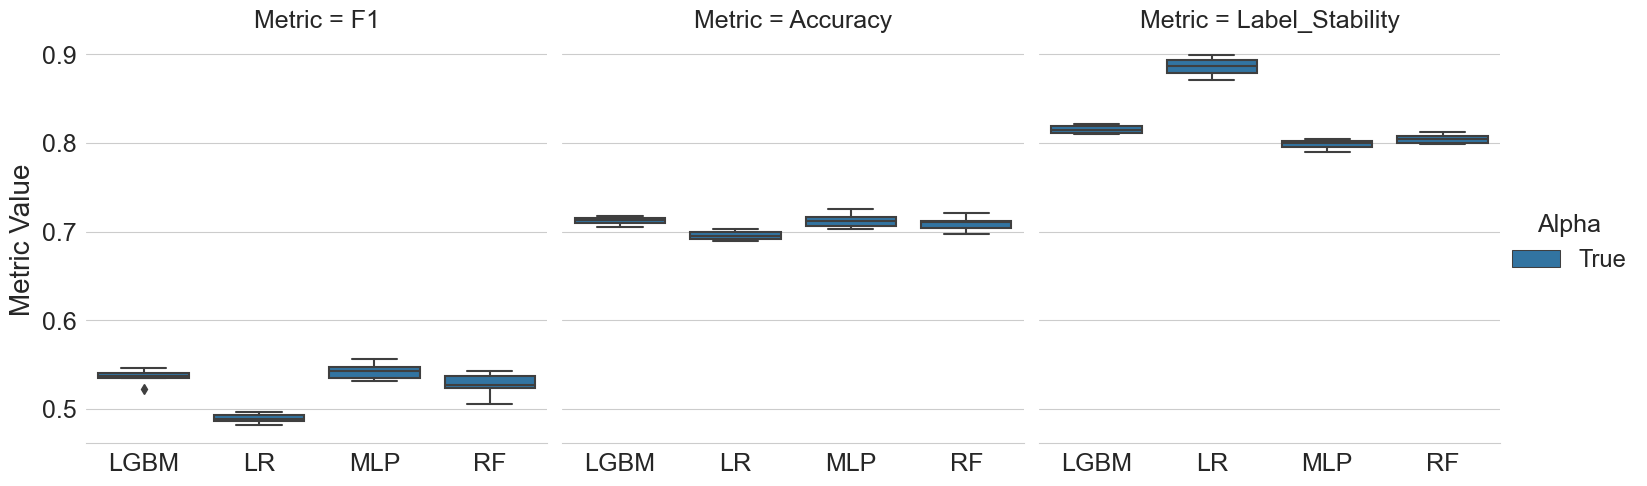

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

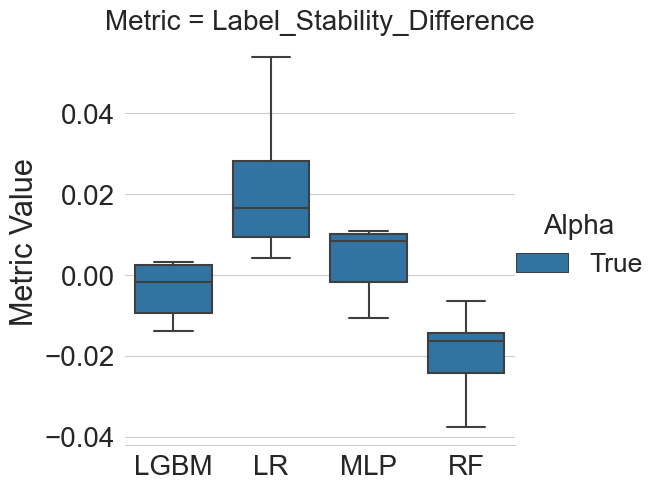

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

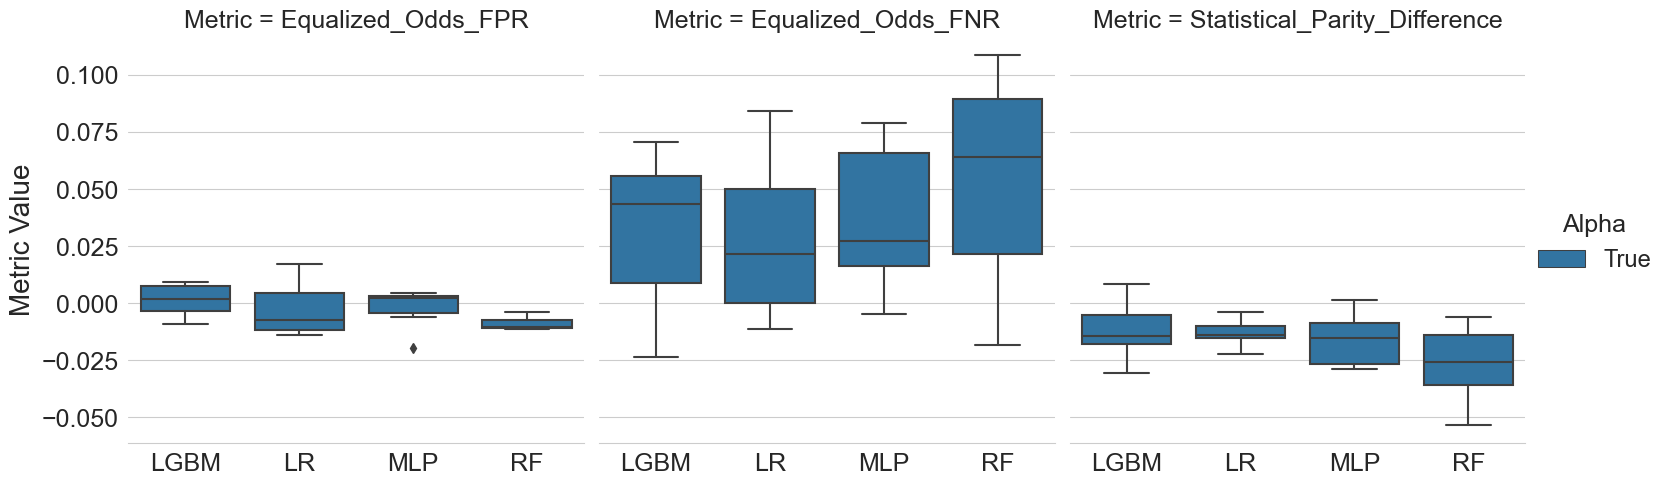

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR', 'Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)